In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
data=fetch_california_housing()
X=data.data
y=data.target

In [12]:
print(X.shape, y.shape)  # (20640, 8) (20640,)
print(y_test[5:15])

(20640, 8) (20640,)
tensor([[1.5870],
        [1.9820],
        [1.5750],
        [3.4000],
        [4.4660],
        [1.2320],
        [2.5390],
        [2.1510],
        [2.2050],
        [2.1980]])


In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [70]:
x_train=torch.tensor(x_train, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test=torch.tensor(x_test, dtype=torch.float32)
y_test=torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [10]:
train_dataset=TensorDataset(x_train, y_train)
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)

In [96]:
model=nn.Sequential(
    nn.Linear(8,265),
    nn.BatchNorm1d(265),
    nn.Linear(265,128),
    nn.BatchNorm1d(128),
    nn.Dropout(0.4),
    nn.Linear(128,64),
    nn.BatchNorm1d(64),
    nn.Dropout(0.3),
    nn.Linear(64,32),
    nn.BatchNorm1d(32),
    nn.Dropout(0.2),
    nn.Linear(32,16),
    nn.BatchNorm1d(16),
    nn.Dropout(0.3),
    nn.Linear(16,8),
    nn.BatchNorm1d(8),
    nn.Linear(8,1)
)

In [111]:
critrion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [98]:
epochs=150
early_stopping2= EarlyStopping1(10)
for epoch in range(epochs):
    for inputs, targets in train_loader:

        outputs=model(inputs)
        loss=critrion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    val_loss_str = f"{early_stopping2.best_loss:.4f}" if early_stopping2.best_loss is not None else "N/A"
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, val_loss: {val_loss_str}')

Epoch 1/150, Loss: 1.1204, val_loss: N/A
Epoch 2/150, Loss: 0.3624, val_loss: N/A
Epoch 3/150, Loss: 0.5301, val_loss: N/A
Epoch 4/150, Loss: 0.5333, val_loss: N/A
Epoch 5/150, Loss: 0.6811, val_loss: N/A
Epoch 6/150, Loss: 0.6664, val_loss: N/A
Epoch 7/150, Loss: 0.4723, val_loss: N/A
Epoch 8/150, Loss: 0.6051, val_loss: N/A
Epoch 9/150, Loss: 0.3841, val_loss: N/A
Epoch 10/150, Loss: 0.6253, val_loss: N/A
Epoch 11/150, Loss: 0.9323, val_loss: N/A
Epoch 12/150, Loss: 0.3785, val_loss: N/A
Epoch 13/150, Loss: 0.5241, val_loss: N/A
Epoch 14/150, Loss: 0.6881, val_loss: N/A
Epoch 15/150, Loss: 0.6616, val_loss: N/A
Epoch 16/150, Loss: 0.6812, val_loss: N/A
Epoch 17/150, Loss: 0.2373, val_loss: N/A
Epoch 18/150, Loss: 0.3895, val_loss: N/A
Epoch 19/150, Loss: 0.4760, val_loss: N/A
Epoch 20/150, Loss: 0.4470, val_loss: N/A
Epoch 21/150, Loss: 0.3949, val_loss: N/A
Epoch 22/150, Loss: 0.5237, val_loss: N/A
Epoch 23/150, Loss: 0.5601, val_loss: N/A
Epoch 24/150, Loss: 0.7908, val_loss: N/A
E

In [100]:
with torch.no_grad():
    pred=model(x_test)
    test_loss=critrion(pred, y_test)
    print(f'test loss: {test_loss.item():.4f}')
    print(f'test loss: {test_loss:.4f}')
    r2 = 1 - test_loss.item() / torch.var(y_test, unbiased=True).item()
    print(f'r2: {r2:.4f}')

test loss: 0.5938
test loss: 0.5938
r2: 0.5470


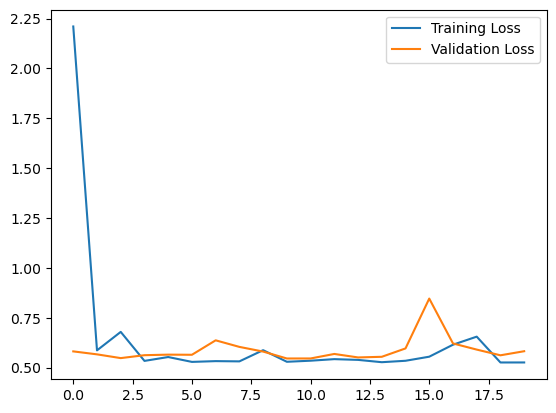

In [101]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


EarlyStopping torch


In [102]:
import torch

class EarlyStopping1:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# استخدام EarlyStopping أثناء التدريب
early_stopping = EarlyStopping(patience=5)




In [114]:
data=fetch_california_housing()
X=data.data
y=data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

x_train=torch.tensor(x_train, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test=torch.tensor(x_test, dtype=torch.float32)
y_test=torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

critrion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.005)

train_dataset=TensorDataset(x_train, y_train)
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)


model=nn.Sequential(
    
    nn.Linear(8, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(64, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(32, 16),
    nn.BatchNorm1d(16),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(16, 8),
    nn.BatchNorm1d(8),
    nn.ReLU(),
    nn.Linear(8, 1)
)


In [115]:
epochs=150
early_stopping1 = EarlyStopping1(patience=10)

for epoch in range(epochs):
    for inputs, targets in train_loader:

        outputs=model(inputs)
        loss=critrion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, MSR: {test_loss.item():.4f}')   


Epoch 1/150, Loss: 6.5557, MSR: 4.9980
Epoch 2/150, Loss: 5.8082, MSR: 4.9980
Epoch 3/150, Loss: 7.0784, MSR: 4.9980
Epoch 4/150, Loss: 5.4672, MSR: 4.9980
Epoch 5/150, Loss: 6.1499, MSR: 4.9980
Epoch 6/150, Loss: 5.8390, MSR: 4.9980
Epoch 7/150, Loss: 4.7552, MSR: 4.9980
Epoch 8/150, Loss: 7.5620, MSR: 4.9980
Epoch 9/150, Loss: 5.5898, MSR: 4.9980
Epoch 10/150, Loss: 4.2438, MSR: 4.9980
Epoch 11/150, Loss: 6.9255, MSR: 4.9980
Epoch 12/150, Loss: 6.6023, MSR: 4.9980
Epoch 13/150, Loss: 6.7793, MSR: 4.9980
Epoch 14/150, Loss: 5.8613, MSR: 4.9980
Epoch 15/150, Loss: 5.6052, MSR: 4.9980
Epoch 16/150, Loss: 7.7727, MSR: 4.9980
Epoch 17/150, Loss: 4.1727, MSR: 4.9980
Epoch 18/150, Loss: 3.8754, MSR: 4.9980
Epoch 19/150, Loss: 6.1603, MSR: 4.9980
Epoch 20/150, Loss: 6.6946, MSR: 4.9980
Epoch 21/150, Loss: 5.9051, MSR: 4.9980
Epoch 22/150, Loss: 5.7307, MSR: 4.9980
Epoch 23/150, Loss: 4.6837, MSR: 4.9980
Epoch 24/150, Loss: 5.6929, MSR: 4.9980
Epoch 25/150, Loss: 6.5069, MSR: 4.9980
Epoch 26/

Epoch 10/100, Train Loss: 0.3980, Val Loss: 1.0194
Epoch 20/100, Train Loss: 0.3832, Val Loss: 0.3140
Epoch 30/100, Train Loss: 0.3647, Val Loss: 0.3069
Epoch 40/100, Train Loss: 0.3588, Val Loss: 0.6076
Epoch 50/100, Train Loss: 0.3502, Val Loss: 0.4173
Epoch 60/100, Train Loss: 0.3503, Val Loss: 0.5676
Epoch 70/100, Train Loss: 0.3403, Val Loss: 0.2981
Epoch 80/100, Train Loss: 0.3289, Val Loss: 0.2784
Epoch 90/100, Train Loss: 0.3296, Val Loss: 0.2955
Epoch 100/100, Train Loss: 0.3245, Val Loss: 0.3159

Final Results on Test Set:
MSE: 0.3159, RMSE: 0.5620, MAE: 0.3705, R2: 0.7590


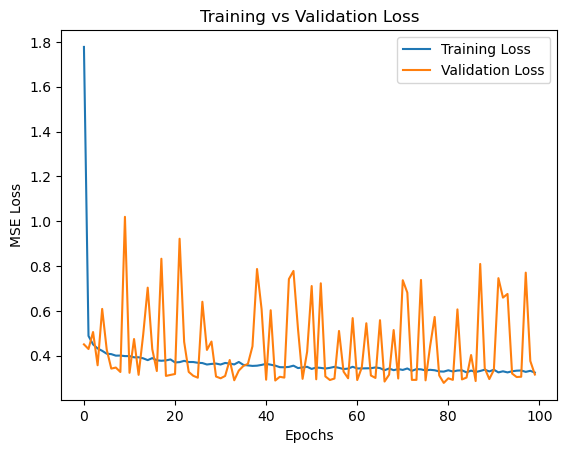

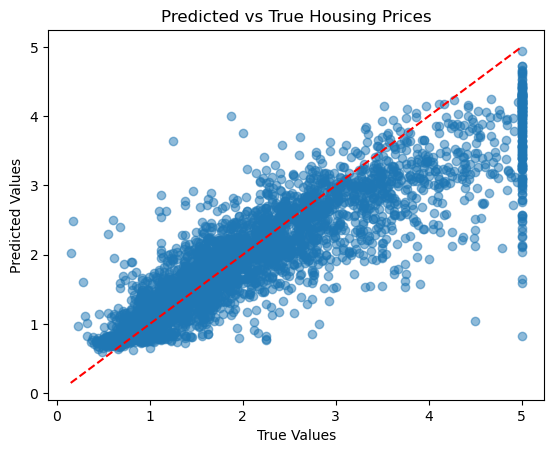

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1) Loss function + Optimizer
# -------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#-------------------------------
model=nn.Sequential(
    
    nn.Linear(8, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(64, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(32, 16),
    nn.BatchNorm1d(16),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(16, 8),
    nn.BatchNorm1d(8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
# -------------------------------
# 2) Training loop
# -------------------------------
num_epochs = 100
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / len(train_loader))

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test)
        val_loss = criterion(val_outputs, y_test).item()
        val_losses.append(val_loss)
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_loss:.4f}")

# -------------------------------
# 3) Evaluation on Test Data
# -------------------------------
model.eval()
with torch.no_grad():
    y_pred = model(x_test).numpy()
    y_true = y_test.numpy()

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nFinal Results on Test Set:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# -------------------------------
# 4) Visualization
# -------------------------------
# Loss curves
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Predicted vs True values
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Housing Prices")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # خط مثالي (y=x)
plt.show()


c:\Users\saaad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8724 - mse: 0.8724 - val_loss: 0.4222 - val_mse: 0.4222
Epoch 2/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3783 - mse: 0.3783 - val_loss: 0.3846 - val_mse: 0.3846
Epoch 3/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3464 - mse: 0.3464 - val_loss: 0.3421 - val_mse: 0.3421
Epoch 4/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3316 - mse: 0.3316 - val_loss: 0.3285 - val_mse: 0.3285
Epoch 5/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3178 - mse: 0.3178 - val_loss: 0.3189 - val_mse: 0.3189
Epoch 6/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3184 - mse: 0.3184 - val_loss: 0.3107 - val_mse: 0.3107
Epoch 7/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3064 - mse: 0.3064 - val_loss: 0.3083 - val_mse: 0.3083
Epoch 8/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2966 - mse: 0.2966 - val_loss: 0.3120 - val_mse: 0.3120
Epoch 9/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

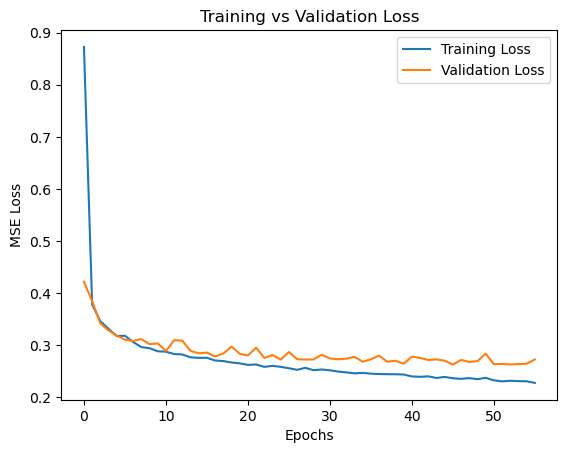

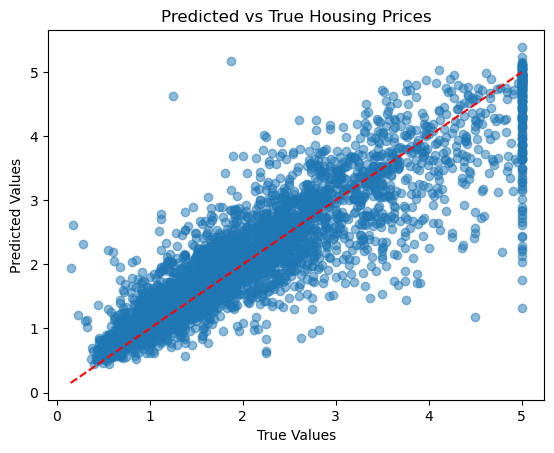

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -------------------------------
# 1) Load and prepare data
# -------------------------------
data = fetch_california_housing()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# -------------------------------
# 2) Build model
# -------------------------------
model_keras = Sequential()
model_keras.add(Dense(64, input_dim=8, activation='relu'))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(16, activation='relu'))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dense(1))   # output layer for regression

model_keras.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_keras.summary()


# -------------------------------
# 3) Early stopping
# -------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)

# -------------------------------
# 4) Train model
# -------------------------------
history = model_keras.fit(
    x_train, y_train,
    epochs=300,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# -------------------------------
# 5) Results as DataFrame
# -------------------------------
hist_df = pd.DataFrame(history.history)
print(hist_df.tail())   # عرض آخر القيم

# -------------------------------
# 6) Evaluate on test set
# -------------------------------
y_pred = model_keras.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Results on Test Set:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# -------------------------------
# 7) Visualization
# -------------------------------
# Loss curves
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Predicted vs True values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Model: "functional_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5645 - mse: 0.5645 - val_loss: 0.3830 - val_mse: 0.3830
Epoch 2/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3719 - mse: 0.3719 - val_loss: 0.5001 - val_mse: 0.5001
Epoch 3/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3650 - mse: 0.3650 - val_loss: 0.3523 - val_mse: 0.3523
Epoch 4/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3395 - mse: 0.3395 - val_loss: 0.3445 - val_mse: 0.3445
Epoch 5/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3269 - mse: 0.3269 - val_loss: 0.3376 - val_mse: 0.3376
Epoch 6/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3185 - mse: 0.3185 - val_loss: 0.3213 - val_mse: 0.3213
Epoch 7/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3199 - mse: 0.3199 - val_loss: 0.3258 - val_mse: 0.3258
Epoch 8/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3086 - mse: 0.3086 - val_loss: 0.3117 - val_mse: 0.3117
Epoch 9/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

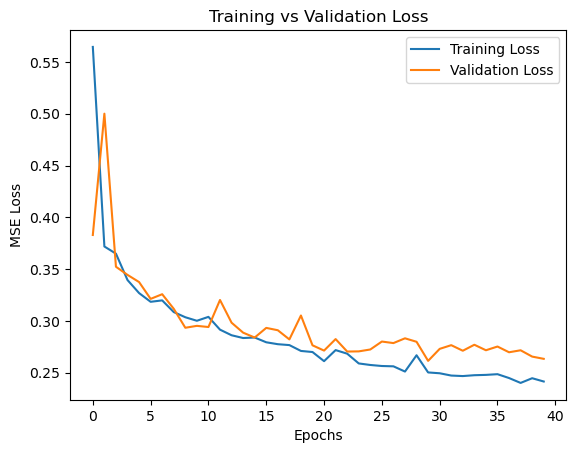

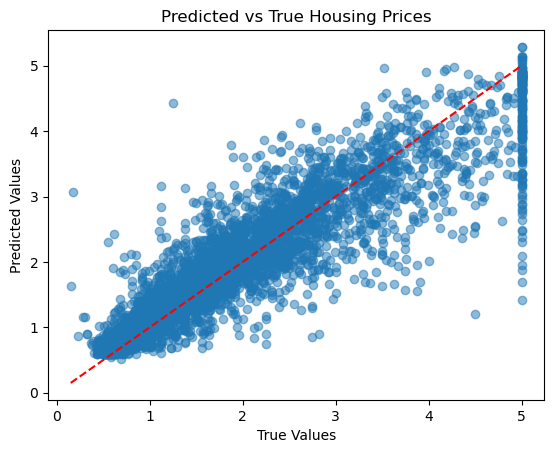

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# 1) البيانات
# -------------------------------
data = fetch_california_housing()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# -------------------------------
# 2) الموديل بالـ Functional API
# -------------------------------
inputs = Input(shape=(X.shape[1],))   # 8 Features

x = Dense(128)(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
outputs = Dense(1)(x)   # Linear output for regression

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

# -------------------------------
# 3) EarlyStopping
# -------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)

# -------------------------------
# 4) التدريب
# -------------------------------
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# -------------------------------
# 5) التقييم
# -------------------------------
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Results on Test Set:")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# -------------------------------
# 6) الرسومات
# -------------------------------
# منحنى اللوس
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# القيم المتوقعة مقابل الحقيقية
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


def regression_model_with_bn_dropout(X, y, test_size=0.2, random_state=42,
                                     epochs=300, batch_size=32, dropout_rate=0.3):
    """
    Input:
        X : Features (numpy array or DataFrame)
        y : Target values
        test_size : نسبة البيانات للاختبار
        random_state : random seed
        epochs : عدد الدورات التدريبية
        batch_size : حجم الدفعة
        dropout_rate : نسبة Dropout
    
    Output:
        model : الموديل المدرب
        history : تفاصيل التدريب
        metrics : قاموس فيه MSE, RMSE, MAE, R2
    """

    # -------------------------------
    # 1) Train/Test split + Scaling
    # -------------------------------
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # -------------------------------
    # 2) Build model (Functional API)
    # -------------------------------
    inputs = Input(shape=(X.shape[1],))

    x = Dense(128)(inputs)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(32)(x)
    x = BatchNormalization()(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(8, activation='relu')(x)
    outputs = Dense(1)(x)  # Regression output

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    # -------------------------------
    # 3) EarlyStopping
    # -------------------------------
    early_stopping = EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=10,
        restore_best_weights=True
    )

    # -------------------------------
    # 4) Training
    # -------------------------------
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    # -------------------------------
    # 5) Evaluation
    # -------------------------------
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"\nFinal Results on Test Set: {metrics}")

    # -------------------------------
    # 6) Visualizations
    # -------------------------------
    # Loss curves
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

    # Predicted vs True
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    return model, history, metrics
